<a href="https://colab.research.google.com/github/Neopsychgnoesis/Data_Analytics/blob/Neopsychgnoesis-patch-1/Copy_of_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates


# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data analysis purpose

In [140]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', parse_dates=['date'],index_col= ['date'])

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [141]:
df.columns

Index(['state', 'fips', 'cases', 'deaths'], dtype='object')

In [142]:
df.groupby('state')['cases','deaths',].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,cases,deaths
state,,
Alabama,38963811,617561
Alaska,3695134,16773
Arizona,57476159,1219624
Arkansas,22669982,354022
California,220584266,3569835
Colorado,29541328,631507
Connecticut,20734768,1227641
Delaware,6246064,162132
District of Columbia,4179167,160278


**1. Analyzing New York state data for Covid 19**

In [143]:
df_NY=df.loc[df['state']=='New York']
df_NY

,state,fips,cases,deaths
date,,,,
2020-03-01,New York,36,1,0
2020-03-02,New York,36,1,0
2020-03-03,New York,36,2,0
2020-03-04,New York,36,11,0
2020-03-05,New York,36,22,0
...,...,...,...,...
2021-01-13,New York,36,1179523,39760
2021-01-14,New York,36,1193710,39997
2021-01-15,New York,36,1213179,40203


**2. Find new covid 19 cases daily basis (new cases added everyday)**

In [10]:
df_NY=df.loc[df['state']=='New York']
df_NY=df_NY.drop(['fips', 'state'], axis=1)
df_NY['new_cases']=df_NY['cases'] - df_NY['cases'].shift(1)
df_NY['new_deaths']=df_NY['deaths'] - df_NY['deaths'].shift(1)
df_NY['percentage_deaths']=(df_NY['deaths'] / df_NY['cases'])*100
df_NY['new_cases'] = df_NY['new_cases'].fillna(1)
df_NY['new_deaths'] = df_NY['new_deaths'].fillna(0)
df_NY

,cases,deaths,new_cases,new_deaths,percentage_deaths
date,,,,,
2020-03-01,1,0,1.0,0.0,0.000000
2020-03-02,1,0,0.0,0.0,0.000000
2020-03-03,2,0,1.0,0.0,0.000000
2020-03-04,11,0,9.0,0.0,0.000000
2020-03-05,22,0,11.0,0.0,0.000000
...,...,...,...,...,...
2021-01-13,1179523,39760,14704.0,172.0,3.370854
2021-01-14,1193710,39997,14187.0,237.0,3.350646
2021-01-15,1213179,40203,19469.0,206.0,3.313856


In [ ]:
df_NY.describe() #322 days / 46 weeks

,cases,deaths,new_cases,new_deaths,percentage_deaths
count,3.220000e+02,322.000000,322.000000,322.000000,322.000000
mean,4.473855e+05,27777.204969,3817.155280,125.391304,6.105752
std,2.507278e+05,10954.840363,4441.875571,221.592556,2.220109
min,1.000000e+00,0.000000,0.000000,-102.000000,0.000000
25%,3.597545e+05,28570.750000,711.250000,10.250000,5.004158
50%,4.253115e+05,32394.500000,1456.000000,31.000000,7.122842
75%,5.049088e+05,33103.250000,6003.750000,130.750000,7.763003
max,1.229124e+06,40376.000000,19560.000000,1036.000000,7.981072


[Text(0, 0.5, 'Cases (Thousands)'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Total Cases in NY')]

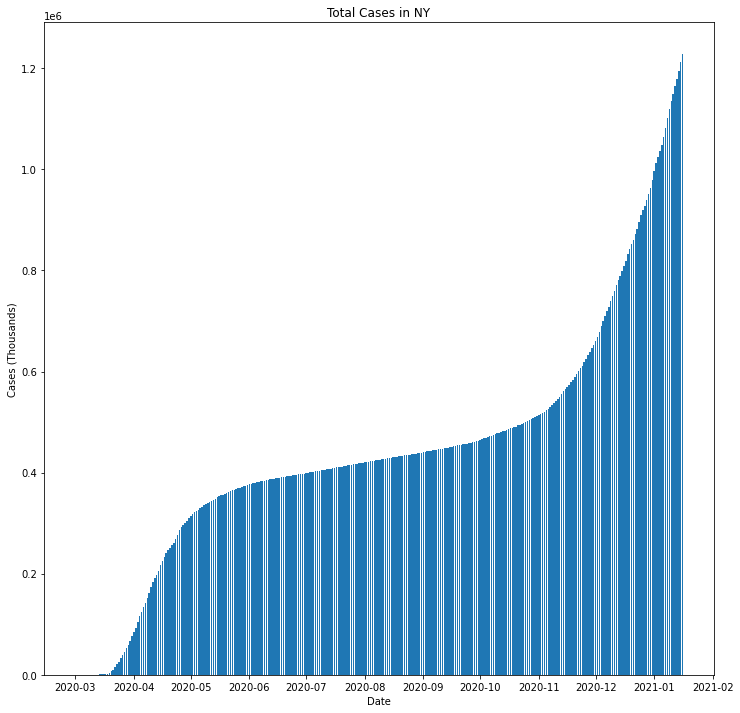

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.bar(df_NY.index.values,
       df_NY['cases'])
ax.set(xlabel="Date",
       ylabel="Cases (Thousands)",
       title="Total Cases in NY")


[Text(0, 0.5, 'Deaths '),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Total Deaths in NY')]

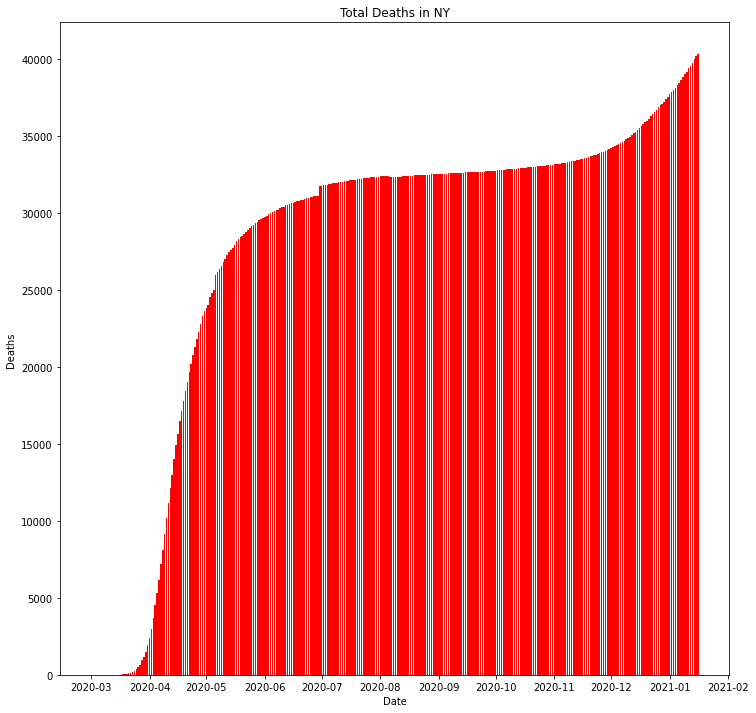

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 12))
ax1.bar(df_NY.index.values,
       df_NY['deaths'], 
        color='red')
ax1.set(xlabel="Date",
       ylabel="Deaths ",
       title="Total Deaths in NY" 
        )


[Text(0, 0.5, 'New cases'), Text(0.5, 0, 'Date'), Text(0.5, 1.0, 'New Cases')]

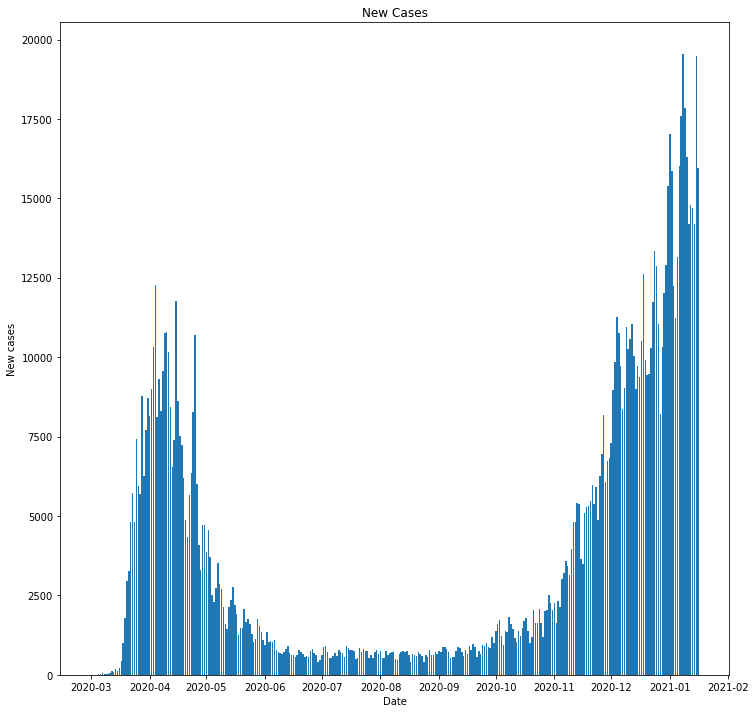

In [ ]:
fig, ax2 = plt.subplots(figsize=(12, 12))
ax2.bar(df_NY.index.values,
       df_NY['new_cases'])
ax2.set(xlabel="Date",
       ylabel="New cases",
       title="New Cases")

[Text(0, 0.5, 'New deaths'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'New Deaths')]

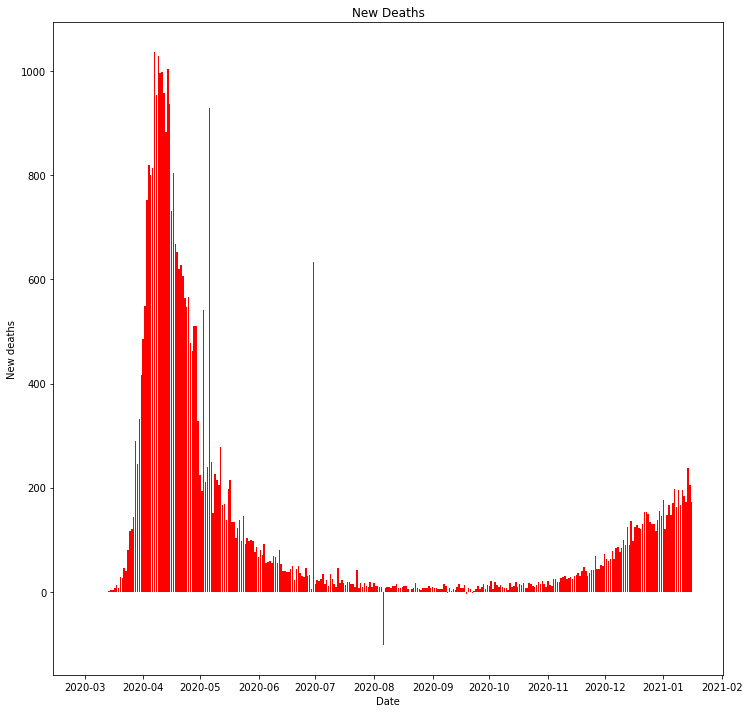

In [ ]:
fig, ax2 = plt.subplots(figsize=(12, 12))
ax2.bar(df_NY.index.values,
       df_NY['new_deaths'],
        color='red')
ax2.set(xlabel="Date",
       ylabel="New deaths",
       title="New Deaths")

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
df_NY_last_30= df_NY.loc['2020-12-16':'2021-01-16']
df_NY_last_30


,cases,deaths,new_cases,new_deaths,percentage_deaths
date,,,,,
2020-12-16,808929,35522,9378.0,97.0,4.391238
2020-12-17,819427,35647,10498.0,125.0,4.350235
2020-12-18,832033,35775,12606.0,128.0,4.299709
2020-12-19,841946,35897,9913.0,122.0,4.263575
2020-12-20,851400,36017,9454.0,120.0,4.230327
2020-12-21,860856,36147,9456.0,130.0,4.198960
2020-12-22,871155,36300,10299.0,153.0,4.166882
2020-12-23,882895,36454,11740.0,154.0,4.128917
2020-12-24,896242,36604,13347.0,150.0,4.084165


# Task5: Comparing Covid 19 data with different states

**Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona**

In [169]:
states = ['New York', 'California', 'Florida', 'Texas', 'Arizona']
for state in states:
  df_states_for_covid1 = df[(df['state'] == state) & (df['state'] >= '2020-07-01')]
  plt.plot(df_states_for_covid1['date'], df_states_for_covid1['cases'])

  #plt.xticks(rotation =90)
plt.legend(states)
plt.show()

KeyError: ignored

# Task6: Conclusion

Below are the conclusions:



1.   Conclusion 1
     --The peak of death rates happened during the month of April 2020.
2.   Conclusion 2
     --Many new cases were increasingly reported during December2020 and into January2021.

